In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

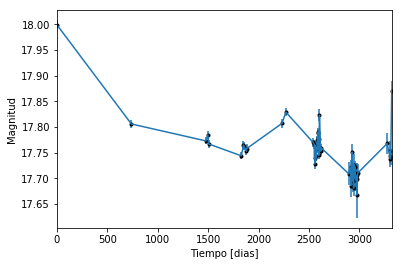

In [2]:
data = np.genfromtxt('LC_2670_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

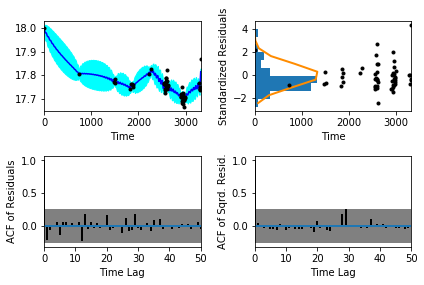

In [5]:
sample.assess_fit()

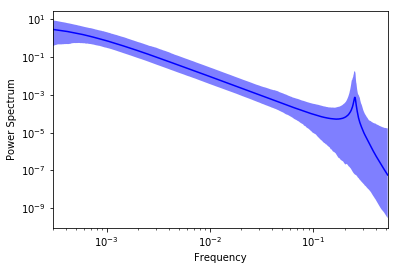

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0168884,'Medida del nivel de ruido')

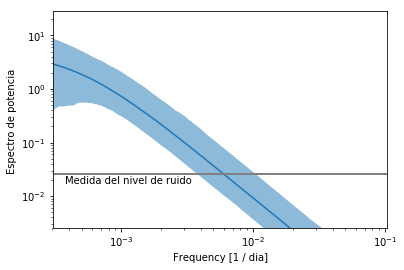

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

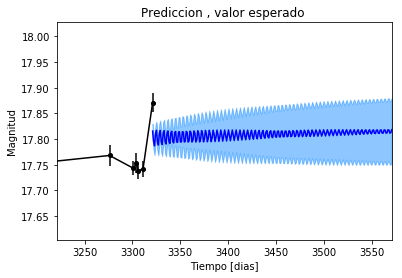

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

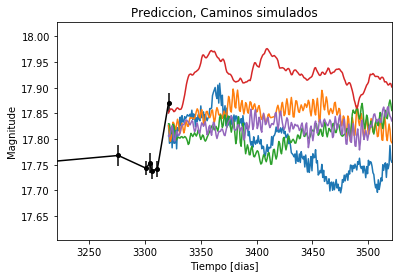

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


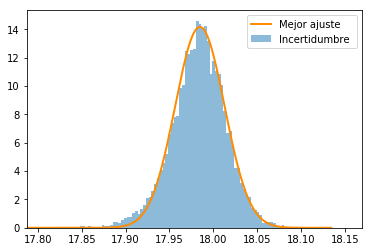

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

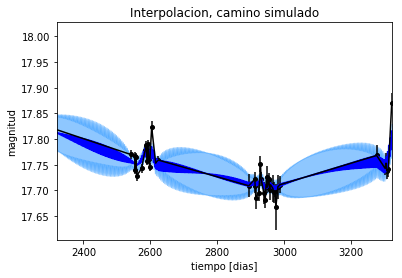

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

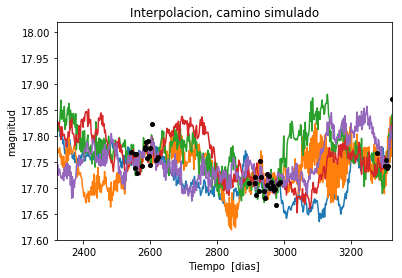

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


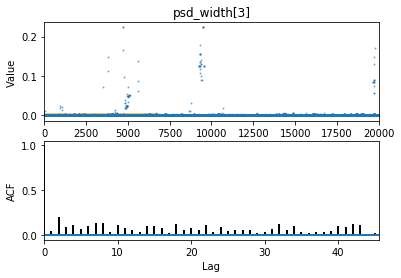

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 321.744799004
Median: 0.00470563755226
Standard deviation: 0.0987302555475
68% credibility interval: [ 0.00093689  0.02049207]
95% credibility interval: [ 0.00039574  0.285415  ]
99% credibility interval: [  3.29584079e-04   8.19937926e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 303.764900992
Median: 0.00461568663816
Standard deviation: 0.0876076450167
68% credibility interval: [ 0.00090441  0.01964236]
95% credibility interval: [ 0.00038859  0.18941389]
99% credibility interval: [  3.28346364e-04   7.21030544e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 201.156161512
Median: 0.204115581082
Standard deviation

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 262.593219346
Median: 0.252462292929
Standard deviation: 0.176558638744
68% credibility interval: [ 0.24009027  0.29560522]
95% credibility interval: [ 0.06029759  0.8321444 ]
99% credibility interval: [ 0.          0.99562012]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 262.593219346
Median: 0.252462292929
Standard deviation: 0.176558638744
68% credibility interval: [ 0.24009027  0.29560522]
95% credibility interval: [ 0.06029759  0.8321444 ]
99% credibility interval: [ 0.          0.99562012]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 401.6292398
Median: 0.0
Standard deviation: 0.000279891003394
68% credib

Plotting parameter summary


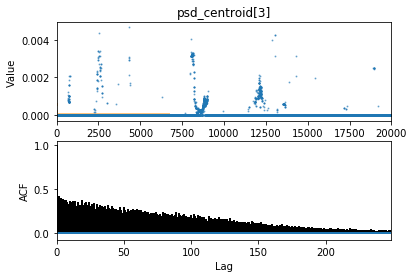

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1435.3972196
Median: 141.824068915
Standard deviation: 3.04049654093
68% credibility interval: [ 137.73188868  143.94381683]
95% credibility interval: [ 133.98379085  145.11074182]
99% credibility interval: [ 131.71268892  145.65740033]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 239.976816557
Median: 1.47146896669
Standard deviation: 2.10174790308
68% credibility interval: [ 0.44537451  4.39280235]
95% credibility interval: [ 0.17546302  6.73491055]
99% credibility interval: [  0.05326745  12.26397367]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 283.384863912
Median: 2.62463083285
Standard deviation: 9.52416685763
68% credibility interval: [ 2.42974256  5.84190085]
95% credibility interval: [  1.10530162  3

Plotting parameter summary


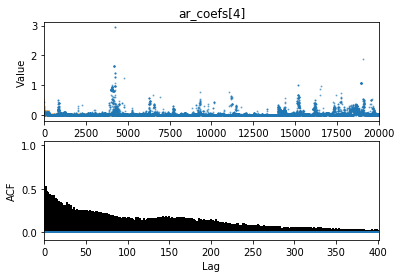

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6676.36605542
Median: 2.55929777625e-39
Standard deviation: 1.43370673957e+94
68% credibility interval: [  4.72155685e-77   7.18476175e-13]
95% credibility interval: [  9.27149753e-135   5.98949567e+016]
99% credibility interval: [  1.18211677e-137   6.64602842e+019]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 737.406786277
Median: 17.8103812633
Standard deviation: 0.040024219778
68% credibility interval: [ 17.77681419  17.84976982]
95% credibility interval: [ 17.7366193   17.89390583]
99% credibility interval: [ 17.67346401  17.92590036]


Plotting parameter summary


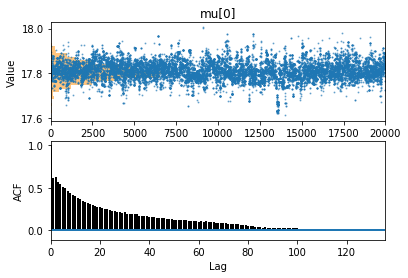

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [32]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 262.593219346
Median: 0.252462292929
Standard deviation: 0.176558638744
68% credibility interval: [ 0.24009027  0.29560522]
95% credibility interval: [ 0.06029759  0.8321444 ]
99% credibility interval: [ 0.          0.99562012]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 262.593219346
Median: 0.252462292929
Standard deviation: 0.176558638744
68% credibility interval: [ 0.24009027  0.29560522]
95% credibility interval: [ 0.06029759  0.8321444 ]
99% credibility interval: [ 0.          0.99562012]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 401.6292398
Median: 0.0
Standard deviation: 0.000279891003394
68% credib

Plotting parameter summary


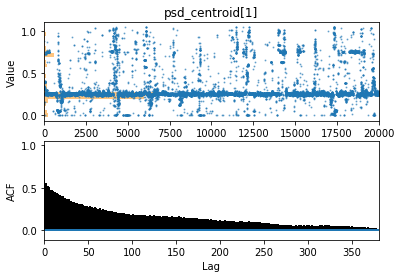

In [36]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [37]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [38]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1435.3972196
Median: 141.824068915
Standard deviation: 3.04049654093
68% credibility interval: [ 137.73188868  143.94381683]
95% credibility interval: [ 133.98379085  145.11074182]
99% credibility interval: [ 131.71268892  145.65740033]


Plotting parameter summary


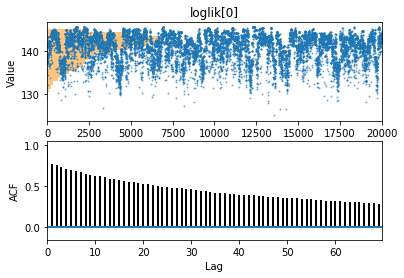

In [39]:
sample.plot_parameter('loglik', 0, doShow=True)

In [40]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [41]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 387.561585443
Median: 0.00640178219214
Standard deviation: 0.00409984241257
68% credibility interval: [ 0.00417968  0.01017681]
95% credibility interval: [ 0.00281018  0.01680158]
99% credibility interval: [ 0.00226845  0.02461608]


Plotting parameter summary


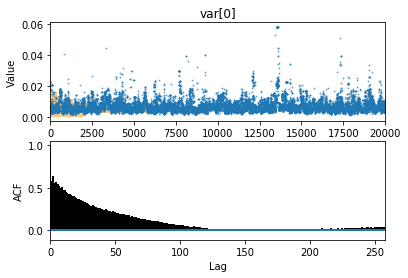

In [42]:
sample.plot_parameter('var', 0, doShow=True)

In [43]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [44]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 449.46549529
Median: 1.13345738875
Standard deviation: 0.257252899032
68% credibility interval: [ 0.91894154  1.41837892]
95% credibility interval: [ 0.78047103  1.78421692]
99% credibility interval: [ 0.70647068  1.94580623]


Plotting parameter summary


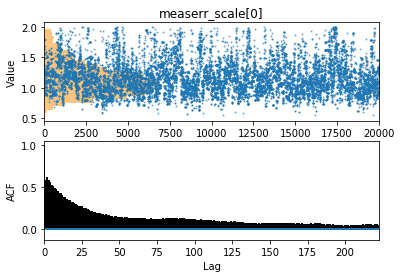

In [45]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [46]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [47]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 219.527376822
Median: 0.0206954110132
Standard deviation: 0.179094379649
68% credibility interval: [ 0.00564291  0.08025946]
95% credibility interval: [  3.08809399e-19   5.76759827e-01]
99% credibility interval: [  2.62948848e-22   1.09376737e+00]


Plotting parameter summary


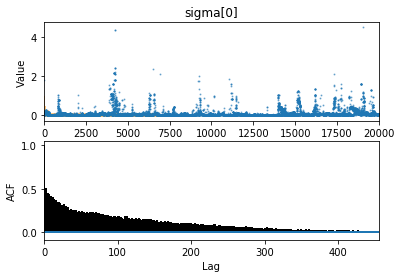

In [48]:
sample.plot_parameter('sigma', 0, doShow=True)

In [49]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [50]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 321.744799004
Median: (-0.0295663927293-1.48779548849j)
Standard deviation: 1.27101580555
68% credibility interval: [-0.12875547-1.72560252j -0.00588667-1.62014453j]
95% credibility interval: [-1.79331532-3.62790034j -0.00248651-1.58227186j]
99% credibility interval: [ -5.15182193e+00-5.83497058j  -2.07083784e-03-3.92577931j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 303.764900992
Median: (-0.0290012144674+1.61153297681j)
Standard deviation: 1.23841012391
68% credibility interval: [-0.12341661+1.57637199j -0.00568257+4.52976587j]
95% credibility interval: [-1.19012257+2.22960371j -0.00244157+1.56430683j]
99% credibility interval: [ -4.53036852e+00+6.05771869j  -2.06306105e-03+1.60984481j]
Posterior summary for pa